# Update density with Beta in self-consistent loop
- reference: https://www.researchgate.net/publication/226474665_A_Tutorial_on_Density_Functional_Theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

In [2]:
%run ../utils.py
%matplotlib inline
sns.set_style("white")

In [3]:
n_grid=200
num_electron=13
bound=[-5,5]
x=np.linspace(*bound,n_grid)
D, D2=get_d_d2(h=x[1]-x[0],n_grid=n_grid)

In [4]:
eig_non, psi_non=np.linalg.eigh(-D2/2)

In [5]:
max_iter=1000
energy_tolerance=1e-5
log={"energy":[float("inf")], "energy_diff":[float("inf")]}

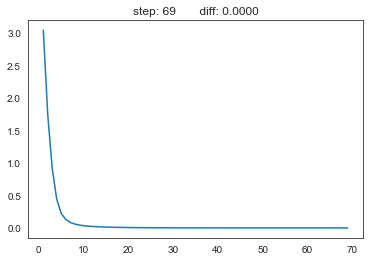

In [6]:
nx=np.full(n_grid, num_electron/float(bound[1]-bound[0]))
eps=1e-5
beta=0.1
edf=[]
plot_steps=10
for i in range(max_iter):
    ex_energy, ex_potential=get_exchange(nx,x)
    ha_energy, ha_potential=get_hatree(nx,x, eps=eps)
    
    # Hamiltonian
    H=-D2/2+np.diagflat(ex_potential+ha_potential+x*x)
    
    energy, psi= np.linalg.eigh(H)
    
    # log
    log["energy"].append(energy[0])
    energy_diff=energy[0]-log["energy"][-2]
    log["energy_diff"].append(energy_diff)
    
    # convergence
    if abs(energy_diff) < energy_tolerance:
        break
    
    # update density with beta
    nx=beta*get_nx(num_electron,psi,x) + (1-beta)*nx
    
    edf.append(energy_diff)
    if i % plot_steps == plot_steps-1:
        plt.plot(edf)
        plt.title(f"step: {i:<5}    diff: {edf[-1]:.4f}")
        plt.pause(0.01)
    
    clear_output(wait=True)
        
else:
    print("not converged")

- plot

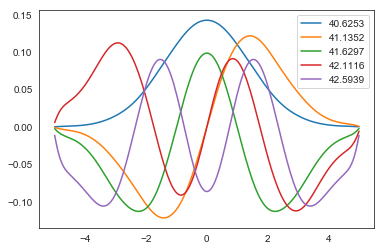

In [7]:
for i in range(5):
    plt.plot(x,psi[:,i], label=f"{energy[i]:.4f}")
    plt.legend(loc=1)

- compare the density to free particles

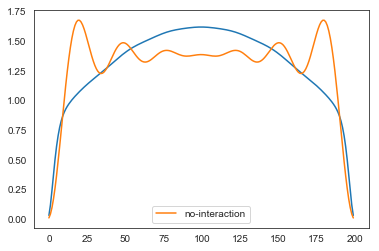

In [8]:
plt.plot(nx)
plt.plot(get_nx(num_electron,psi_non,x), label="no-interaction")
plt.legend()